In [1406]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import util
import soundfile as sf

In [1407]:
def IR(a, b, imp):
    h = signal.lfilter(b, a, imp)
    plt.figure(figsize=(10,5))
    plt.stem(np.arange(N_imp), h, basefmt=' ')
    plt.gca().set_xlabel('$n$')
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

In [1408]:
def FQ(w, h, FS):
    db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
    f, ax = plt.subplots(figsize=(10, 5))
    ax.xaxis.set_ticks(np.arange(0.0, FS/2, 562.5))
    ax.plot(w, db)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain [db]')
    print("\nFrequency characteristic:")
    plt.show()

In [1409]:
def DFT(array):
    tmp_array = np.empty(1024, dtype = complex) #Vytvorenie prázdneho pola o velkosti 1024
    n = np.arange(1024) 


    for k in range(len(array)-1):
        tmp = 0
        #Násobenie bází s vektorom signálu
        tmp = np.dot(array, np.exp((0-1j)*(2*np.pi*n*k/len(array))))
        tmp_n = np.sum(tmp)
        tmp_array[k] = tmp_n
    return tmp_array

In [1410]:
def zplane(a, b):
    
    z = np.roots(b) #Získanie núl
    p = np.roots(a) #Získanie pólov


    plt.figure(figsize=(4,3.5))
    ang = np.linspace(0, 2*np.pi,100)
    plt.plot(np.cos(ang), np.sin(ang))
    plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')

    plt.gca().set_xlabel('Reálna zložka $\mathbb{R}\{$z$\}$')
    plt.gca().set_ylabel('Imaginárna zložka $\mathbb{I}\{$z$\}$')
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

Vzorkovacia frekvencia signálu je: 16000 [Hz].
Dĺžka signálu je: 2.67525 [s].
Dĺžka signálu vo vzorkoch je: 42804 [Vzorkov].
Minimálna hodnota signálu je: -5470 .
Maximálna hodnota signálu je: 8003 .


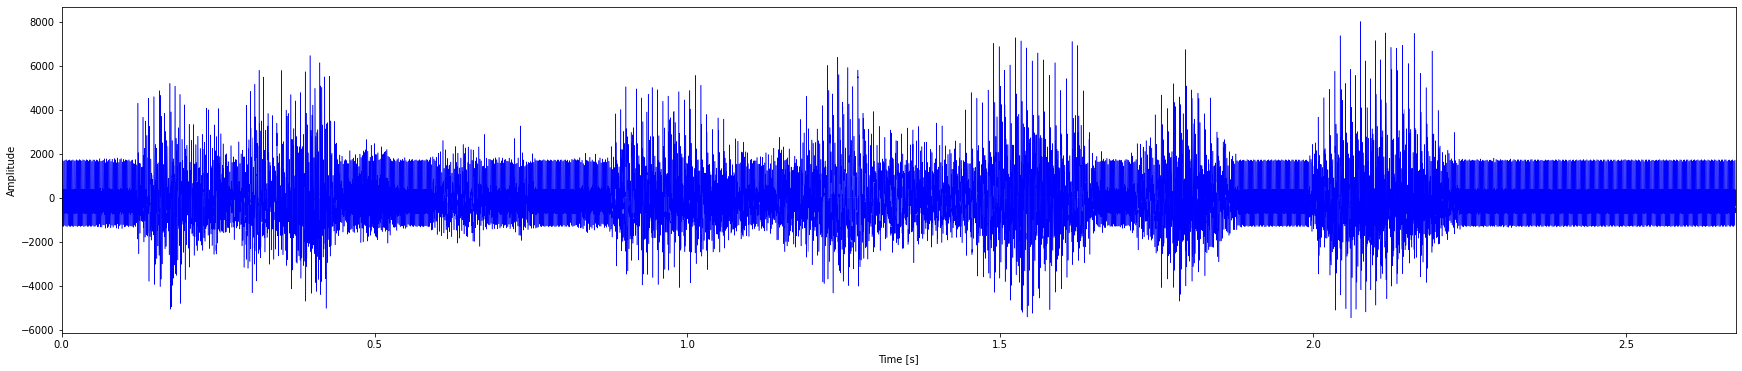

In [1411]:
#1. Úloha------------------------------------------------------------------
rate, data = wavfile.read("xbubla02.wav")

print("Vzorkovacia frekvencia signálu je:",rate,"[Hz].")
print("Dĺžka signálu je:",data.shape[0]/rate,"[s].")
print("Dĺžka signálu vo vzorkoch je:",int(data.shape[0]),"[Vzorkov].")
print("Minimálna hodnota signálu je:", min(data),".")
max_d = max(data)
print("Maximálna hodnota signálu je:", max_d,".")

time = np.arange(len(data))/float(rate)

plt.figure(figsize=(30, 6))
plt.fill_between(time, data)
plt.plot(time, data, color="blue", linewidth=0.5, linestyle="-")
plt.xlim(time[0], time[-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


Frame:


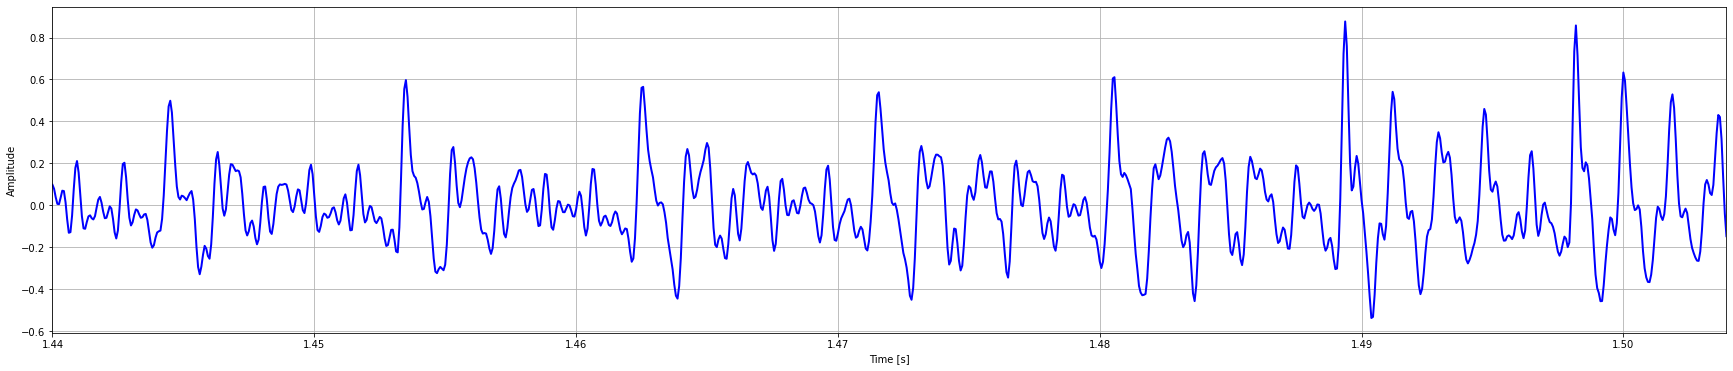

In [1412]:
#2. Úloha------------------------------------------------------------------

#Ustrednenie
data = data - np.average(data) #Odčítanie strednej hodnoty

#Normalizácia
data = data / abs(max_d) #Delenie maximálnou hodnotou

#Rozdelenie na rámce
frame = util.view_as_windows(data, window_shape=(1024,), step=512)
frame = frame.T #Transponovanie

#Výber rámca
nice_frame = frame[:, 45]
start = 45 * 512
time = np.arange(len(nice_frame))/float(rate)
time = time + start/rate

plt.figure(figsize=(30, 6))
plt.grid()
plt.plot(time, nice_frame, color="blue", linewidth=2, linestyle="-")
plt.xlim(time[0], time[-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
print("\nFrame:")
plt.show()


DFT:


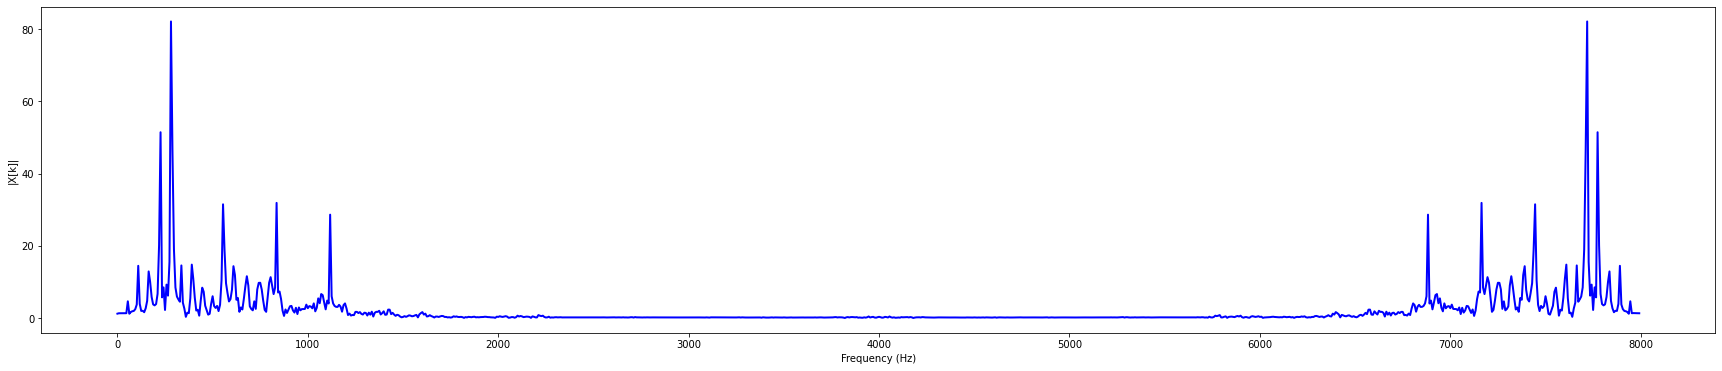


DFT with numpy:


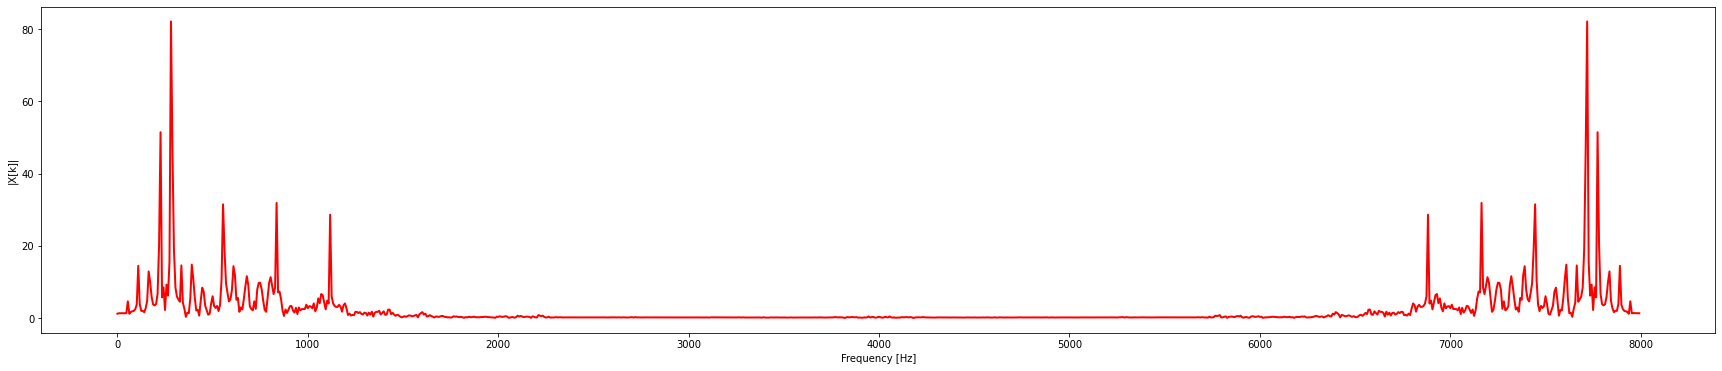

In [1413]:
#3. Úloha------------------------------------------------------------------
frame_dft_np = np.fft.fft(nice_frame) #DFT pomocou knižnice numpy
frame_dft = DFT(nice_frame) #DFT pomocou vlastnej funkcie

freq = np.array(np.arange(0, 1024))
freq = freq/1024
freq = freq * rate

plt.figure(figsize=(30, 6))
plt.plot(freq/2, abs(frame_dft), color="blue", linewidth=2, linestyle="-")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X[k]|')
print("\nDFT:")
plt.show()


print("\nDFT with numpy:")
plt.figure(figsize=(30, 6))
plt.plot(freq/2, abs(frame_dft_np), color="red", linewidth=2, linestyle="-")
plt.xlabel('Frequency [Hz]')
plt.ylabel('|X[k]|')
plt.show()


Spectograph:


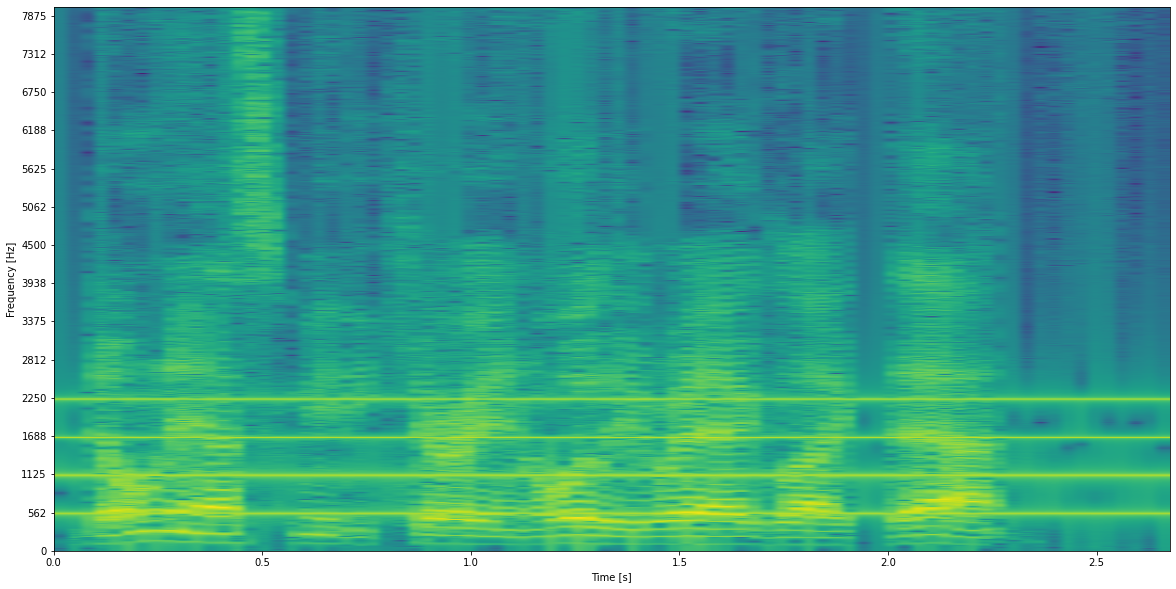

In [1414]:
#4. Úloha------------------------------------------------------------------
spectrum = np.fft.fft(frame, axis=0)[:1024 // 2 + 1:-1] #DFT nad celým signálom
spectrum = np.abs(spectrum)
spectrum = 10*(np.log10(spectrum**2)) #Úprava koeficientov

f, ax = plt.subplots(figsize=(20, 10))
ax.imshow(spectrum, origin='lower', extent=(0, data.shape[0]/rate, 0, rate/2), aspect = 'auto')
ax.axis('tight')
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 562.5))
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]')

print("\nSpectograph:")
plt.show()

In [1415]:
#5. Úloha------------------------------------------------------------------
f, t, Sxx = signal.spectrogram(data, rate)
print((f))
print("\nZo zoznamu frekvencií a približným odhadom zo spektogramu sme schopný určiť frekvencie rušivých komponentov:\nf1 = 562.5 Hz\nf2 = 2*f1 = 1125Hz\nf3 = 3*f1 = 1687.5Hz\nf4 = 4*f1 = 2250Hz\n")

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500.   562.5
  625.   687.5  750.   812.5  875.   937.5 1000.  1062.5 1125.  1187.5
 1250.  1312.5 1375.  1437.5 1500.  1562.5 1625.  1687.5 1750.  1812.5
 1875.  1937.5 2000.  2062.5 2125.  2187.5 2250.  2312.5 2375.  2437.5
 2500.  2562.5 2625.  2687.5 2750.  2812.5 2875.  2937.5 3000.  3062.5
 3125.  3187.5 3250.  3312.5 3375.  3437.5 3500.  3562.5 3625.  3687.5
 3750.  3812.5 3875.  3937.5 4000.  4062.5 4125.  4187.5 4250.  4312.5
 4375.  4437.5 4500.  4562.5 4625.  4687.5 4750.  4812.5 4875.  4937.5
 5000.  5062.5 5125.  5187.5 5250.  5312.5 5375.  5437.5 5500.  5562.5
 5625.  5687.5 5750.  5812.5 5875.  5937.5 6000.  6062.5 6125.  6187.5
 6250.  6312.5 6375.  6437.5 6500.  6562.5 6625.  6687.5 6750.  6812.5
 6875.  6937.5 7000.  7062.5 7125.  7187.5 7250.  7312.5 7375.  7437.5
 7500.  7562.5 7625.  7687.5 7750.  7812.5 7875.  7937.5 8000. ]

Zo zoznamu frekvencií a približným odhadom zo spektogramu sme schopný určiť frekve


Spectograph:


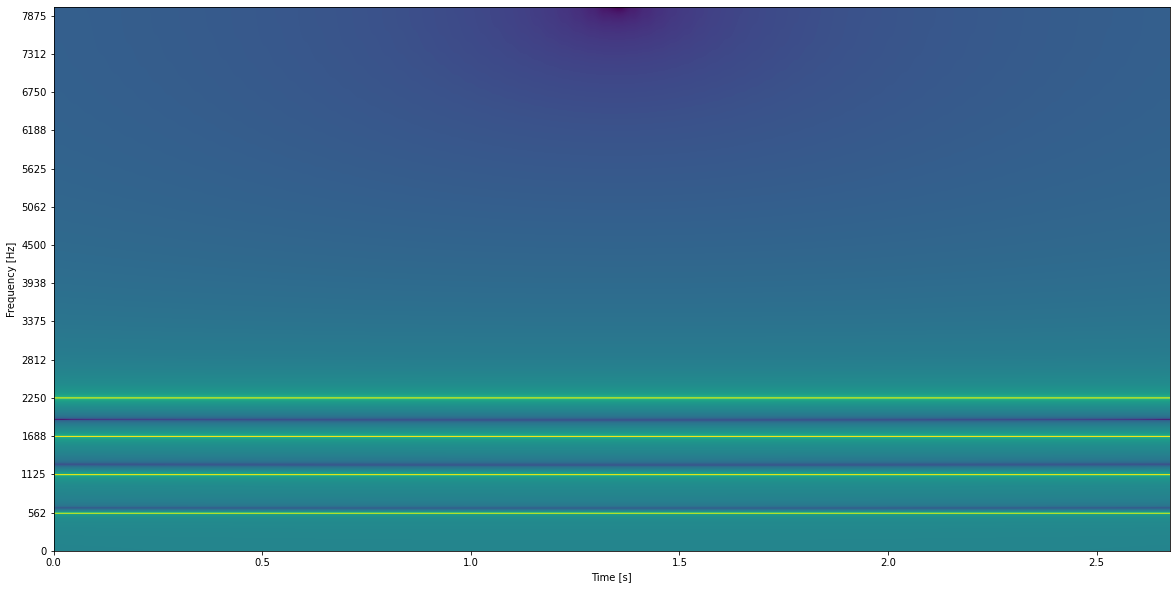

In [1416]:
#6. Úloha------------------------------------------------------------------
freq = 562.5 #Frekvencia f1
t = data.shape[0]/rate #Dĺžka signálu v sekundách
FS = int(rate) #Vzorkovacia frekvencia
time = np.linspace(0., t, int(t*FS)) #Vytvorenie časovej osi

cos1 = np.cos(2*np.pi*freq*time)      #Generácia cosinusovky s frekvenciou f1
cos2 = np.cos(2*np.pi*2*freq*time)    #Generácia cosinusovky s frekvenciou 2*f1
cos3 = np.cos(2*np.pi*3*freq*time)    #Generácia cosinusovky s frekvenciou 3*f1
cos4 = np.cos(2*np.pi*4*freq*time)    #Generácia cosinusovky s frekvenciou 4*f1

cos = cos1 + cos2 + cos3 + cos4       
sf.write('audio/4cos.wav', cos, FS)   #Zápis výsledného signálu do súboru

window = util.view_as_windows(cos, window_shape=(1024,), step=512) #Rozdelenie signálu na rámce
window = window.T

spectrum = np.fft.fft(window, axis=0)[:1024 // 2 + 1:-1] #DFT nad celým signálom
spectrum = np.abs(spectrum)
spectrum = 10*(np.log10(spectrum**2))  #Úprava koeficientov

f, ax = plt.subplots(figsize=(20, 10))
ax.imshow(spectrum, origin='lower', extent=(0, t, 0, FS/2), aspect = 'auto')
ax.axis('tight')
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 562.5))
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]')

print("\nSpectograph:")
plt.show()


Filter 1 (Band-Stop for 562.5Hz):

Koeficienty 'a':
 [  1.          -7.6392677   25.72773818 -49.88698848  60.91253912
 -47.95817991  23.77827807  -6.78875166   0.85463703] 

Koeficienty 'b':
 [  0.65133783  -5.08702402  17.50418235 -34.65464097  43.17229288
 -34.65464097  17.50418235  -5.08702402   0.65133783] 



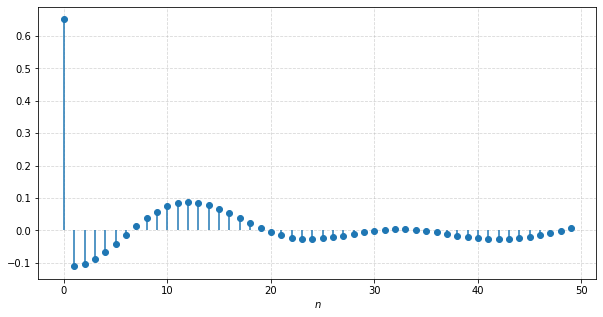



Filter 2 (Band-Stop for 1125Hz):

Koeficienty 'a':
 [  1.          -7.07779146  22.62635854 -42.55552561  51.44162168
 -40.91020406  20.9119127   -6.28978725   0.85463703] 

Koeficienty 'b':
 [  0.65133783  -4.71313437  15.39454156 -29.56323186  36.46183848
 -29.56323186  15.39454156  -4.71313437   0.65133783] 



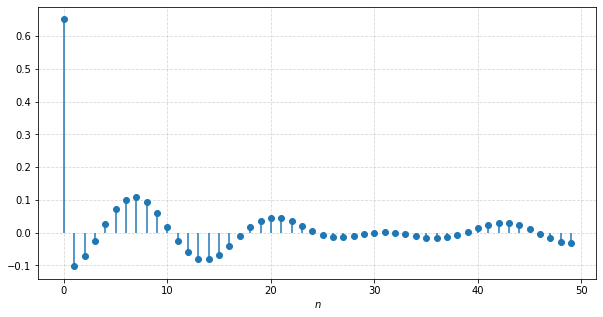



Filter 3 (Band-Stop for 1687.5Hz):

Koeficienty 'a':
 [  1.          -6.17236472  18.12361891 -32.47147947  38.64571315
 -31.21607327  16.75037867  -5.48516597   0.85463703] 

Koeficienty 'b':
 [  0.65133783  -4.11020647  12.33165848 -22.55991062  27.39495912
 -22.55991062  12.33165848  -4.11020647   0.65133783] 



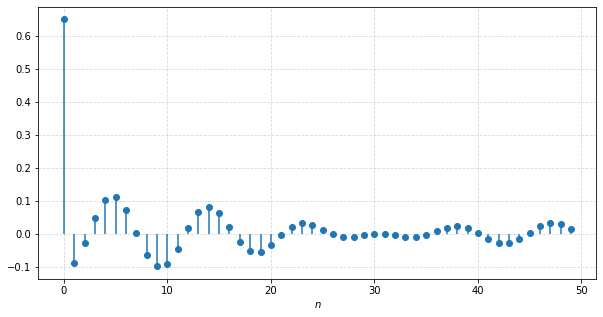



Filter 4 (Band-Stop for 2250Hz):

Koeficienty 'a':
 [  1.          -4.96698734  13.08414173 -21.95117407  25.66498374
 -21.10253953  12.09277962  -4.41398899   0.85463703] 

Koeficienty 'b':
 [  0.65133783  -3.30754005   8.90367227 -15.25291879  18.19627465
 -15.25291879   8.90367227  -3.30754005   0.65133783] 



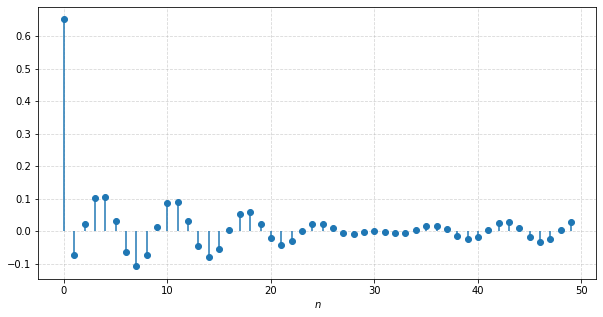

In [1417]:
#7. Úloha------------------------------------------------------------------
sos1 = signal.ellip(4, 3, 80, (freq - 90, freq + 90), 'bandstop', fs = FS, output='sos')        #Filter pre frekvenciu 562.5Hz
sos2 = signal.ellip(4, 3, 80, (2*freq - 90, 2*freq + 90), 'bandstop', fs = FS, output='sos')    #Filter pre frekvenciu 1125Hz
sos3 = signal.ellip(4, 3, 80, (3*freq - 90, 3*freq + 90), 'bandstop', fs = FS, output='sos')    #Filter pre frekvenciu 1687.5Hz
sos4 = signal.ellip(4, 3, 80, (4*freq - 90, 4*freq + 90), 'bandstop', fs = FS, output='sos')    #Filter pre frekvenciu 2250Hz

N_imp = 50
imp = [1, *np.zeros(N_imp-1)]

#--------------------------------------------------------------------------

print("\nFilter 1 (Band-Stop for 562.5Hz):\n")
b1, a1 = signal.sos2tf(sos1)
print("Koeficienty 'a':\n", a1,"\n")
print("Koeficienty 'b':\n", b1,"\n")

IR(a1, b1, imp)
#--------------------------------------------------------------------------

print("\n\nFilter 2 (Band-Stop for 1125Hz):\n")
b2, a2 = signal.sos2tf(sos2)
print("Koeficienty 'a':\n", a2,"\n")
print("Koeficienty 'b':\n", b2,"\n")

IR(a2, b2, imp)
#--------------------------------------------------------------------------

print("\n\nFilter 3 (Band-Stop for 1687.5Hz):\n")
b3, a3 = signal.sos2tf(sos3)
print("Koeficienty 'a':\n", a3,"\n")
print("Koeficienty 'b':\n", b3,"\n")

IR(a3, b3, imp)
#--------------------------------------------------------------------------

print("\n\nFilter 4 (Band-Stop for 2250Hz):\n")
b4, a4 = signal.sos2tf(sos4)
print("Koeficienty 'a':\n", a4,"\n")
print("Koeficienty 'b':\n", b4,"\n")

IR(a4, b4, imp)


Filter 1 (Band-Stop for 562.5Hz):


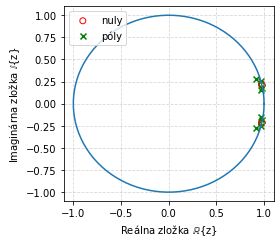

Filter 2 (Band-Stop for 1125Hz):


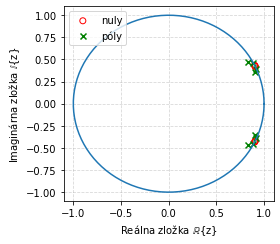

Filter 3 (Band-Stop for 1687.5Hz):


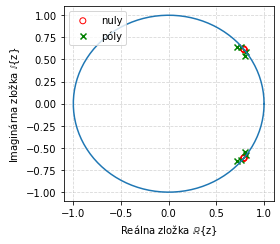

Filter 4 (Band-Stop for 2250Hz):


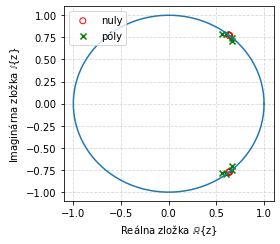

In [1418]:
#8. Úloha------------------------------------------------------------------
print("Filter 1 (Band-Stop for 562.5Hz):")
zplane(a1, b1)

print("Filter 2 (Band-Stop for 1125Hz):")
zplane(a2, b2)

print("Filter 3 (Band-Stop for 1687.5Hz):")
zplane(a3,b3)

print("Filter 4 (Band-Stop for 2250Hz):")
zplane(a4, b4)


Frequency characteristic:


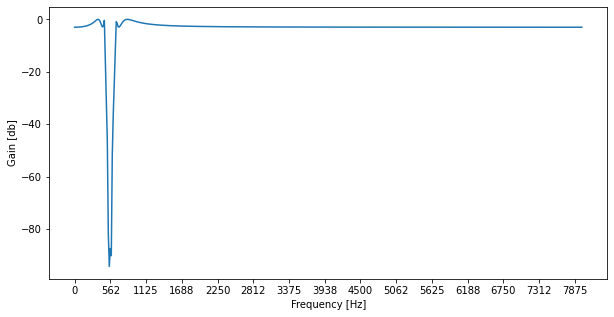


Frequency characteristic:


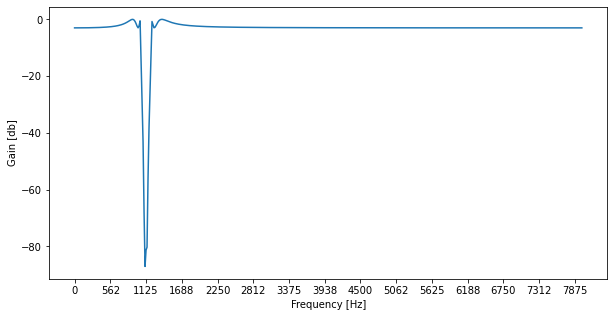


Frequency characteristic:


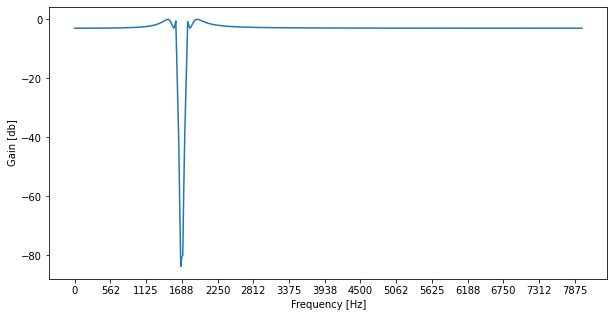


Frequency characteristic:


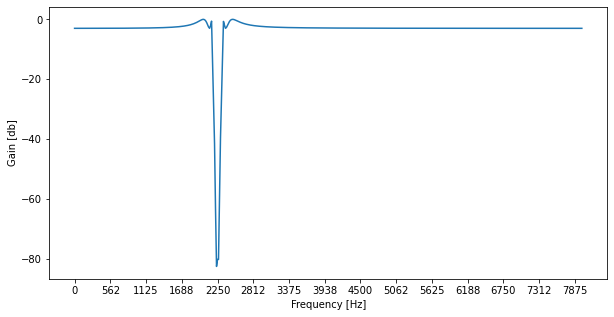

In [1419]:
#9. Úloha------------------------------------------------------------------
w, h = signal.sosfreqz(sos1, fs=FS)
FQ(w, h, FS)

#--------------------------------------------------------------------------

w2, h2 = signal.sosfreqz(sos2, fs=FS)
FQ(w2, h2, FS)

#--------------------------------------------------------------------------

w3, h3 = signal.sosfreqz(sos3, fs=FS)
FQ(w3, h3, FS)

#--------------------------------------------------------------------------

w4, h4 = signal.sosfreqz(sos4, fs=FS)
FQ(w4, h4, FS)


In [1420]:
#10. Úloha------------------------------------------------------------------
filtered1 = signal.sosfilt(sos1, data)      #Filtrácia 1. cosinusovky
filtered2 = signal.sosfilt(sos2, filtered1) #Filtrácia 2. cosinusovky
filtered3 = signal.sosfilt(sos3, filtered2) #Filtrácia 3. cosinusovky
filtered4 = signal.sosfilt(sos4, filtered3) #Filtrácia 4. cosinusovky

filename = 'audio/clean_bandstop.wav'
sf.write(filename, filtered4, FS)